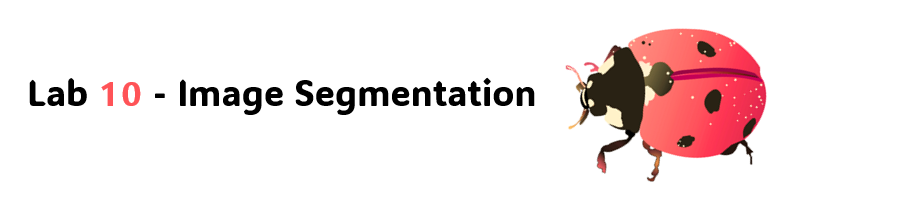



---


# **Task 1** ✅
- Segment an image using global thresholding and then Otsu’s method.
- Compare the results and discuss under what conditions each method performs better.

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_otsu

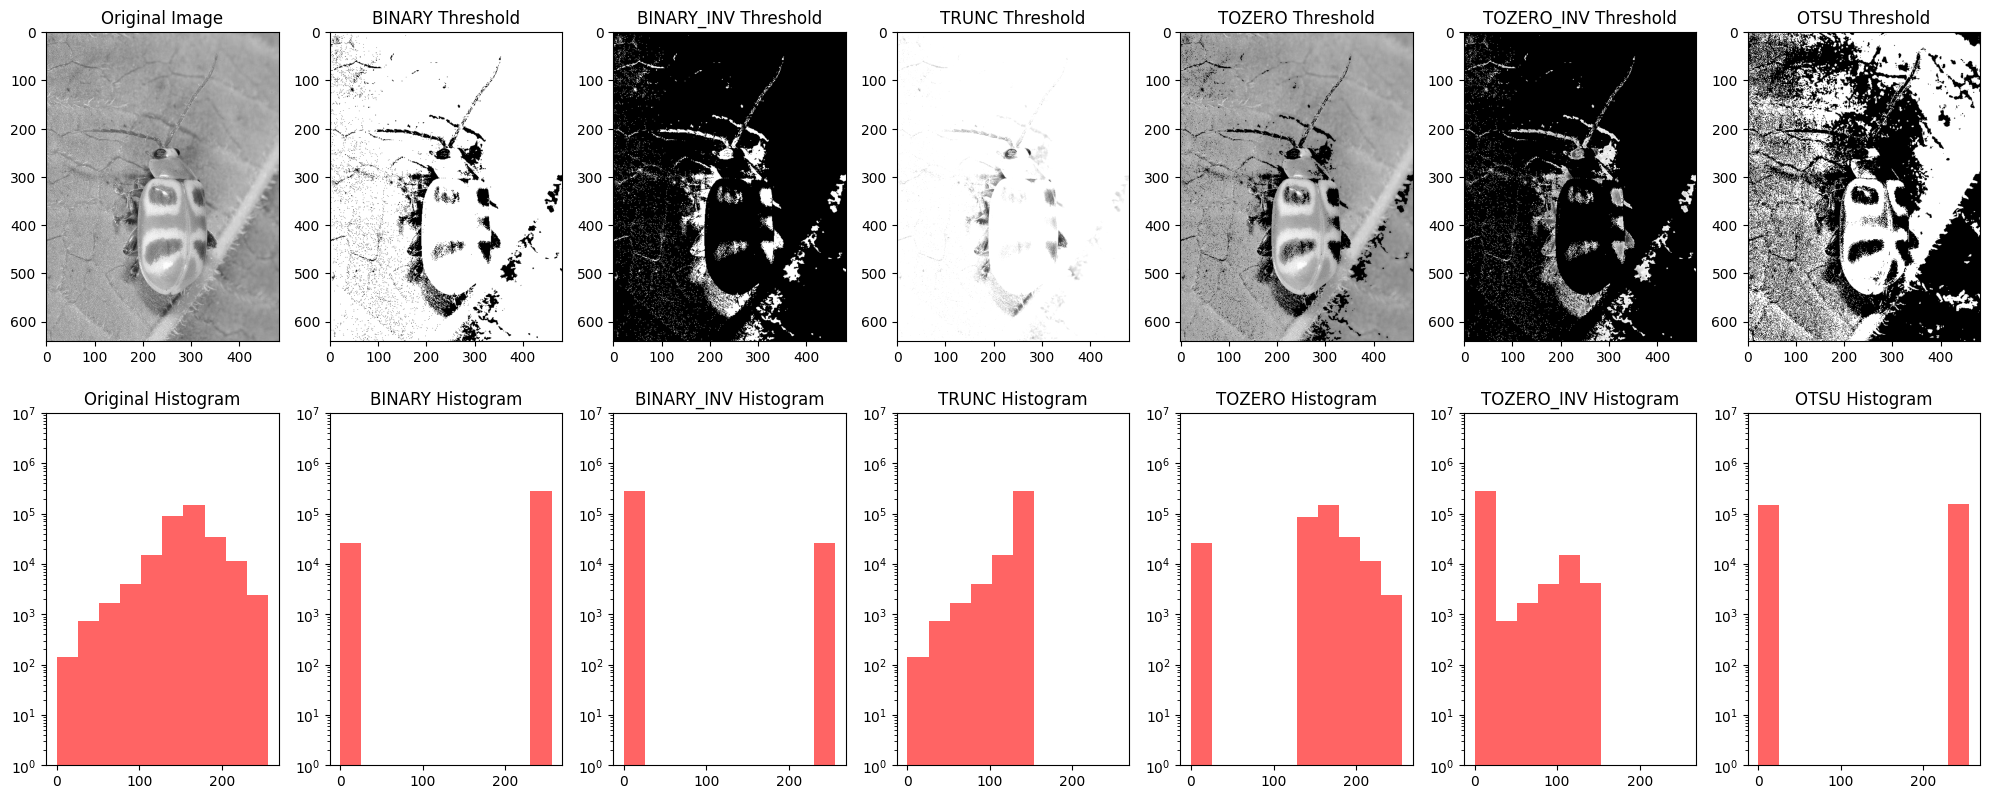

In [ ]:
img = cv.imread('/content/bug.jpg', cv.IMREAD_GRAYSCALE)

# Applying various thresholds
# (img,threshold value,maximum value,threshold type), _ for ignore return value
_, thresh1 = cv.threshold(img, 130, 255, cv.THRESH_BINARY)
_, thresh2 = cv.threshold(img, 130, 255, cv.THRESH_BINARY_INV)
_, thresh3 = cv.threshold(img, 130, 255, cv.THRESH_TRUNC)
_, thresh4 = cv.threshold(img, 130, 255, cv.THRESH_TOZERO)
_, thresh5 = cv.threshold(img, 130, 255, cv.THRESH_TOZERO_INV)

# Otsu's thresholding, if > otsu_thresh = 1 else pixel's intensity <= to otsu_thresh = 0
otsu_thresh = threshold_otsu(img)
binary_otsu = (img > otsu_thresh).astype('uint8') * 255

plt.figure(figsize=(20, 12))

# Plot the images
plt.subplot(3, 7, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(3, 7, 2), plt.imshow(thresh1, cmap='gray'), plt.title('BINARY Threshold')
plt.subplot(3, 7, 3), plt.imshow(thresh2, cmap='gray'), plt.title('BINARY_INV Threshold')
plt.subplot(3, 7, 4), plt.imshow(thresh3, cmap='gray'), plt.title('TRUNC Threshold')
plt.subplot(3, 7, 5), plt.imshow(thresh4, cmap='gray'), plt.title('TOZERO Threshold')
plt.subplot(3, 7, 6), plt.imshow(thresh5, cmap='gray'), plt.title('TOZERO_INV Threshold')
plt.subplot(3, 7, 7), plt.imshow(binary_otsu, cmap='gray'), plt.title('OTSU Threshold')

# Plot the histograms, i=8 then update to 9 ....
for i, image in enumerate([img, thresh1, thresh2, thresh3, thresh4, thresh5, binary_otsu], start=8):
    plt.subplot(3, 7, i)
    plt.hist(image.ravel(), range=(0, 256), color='#FF6464', log=True)
    plt.title(f"{['Original', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV', 'OTSU'][i - 8]} Histogram")
    plt.ylim([1, 1e7])

# Display
plt.tight_layout()
plt.show()

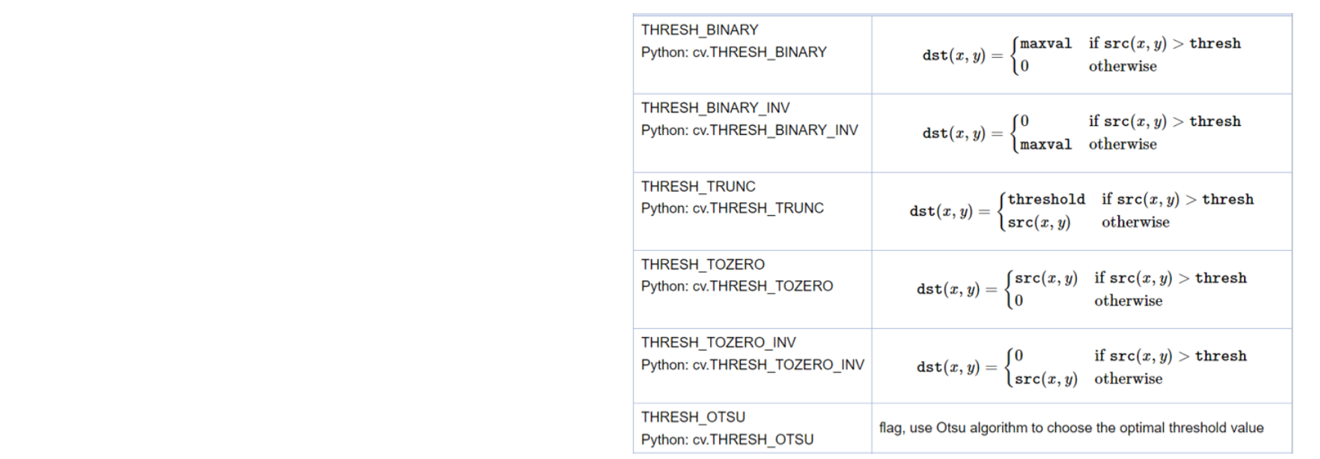

# **Task 2** ✅
- Experiment with varying parameters like scale, sigma, min_size for Felzenszwalb; and n_segments, compactness for SLIC.
- Observe how these changes affect the segmentation results.

In [ ]:
from skimage import io
from skimage.segmentation import felzenszwalb, find_boundaries, slic, mark_boundaries
from skimage.color import rgb2gray
from skimage.util import img_as_float
from matplotlib.colors import LinearSegmentedColormap

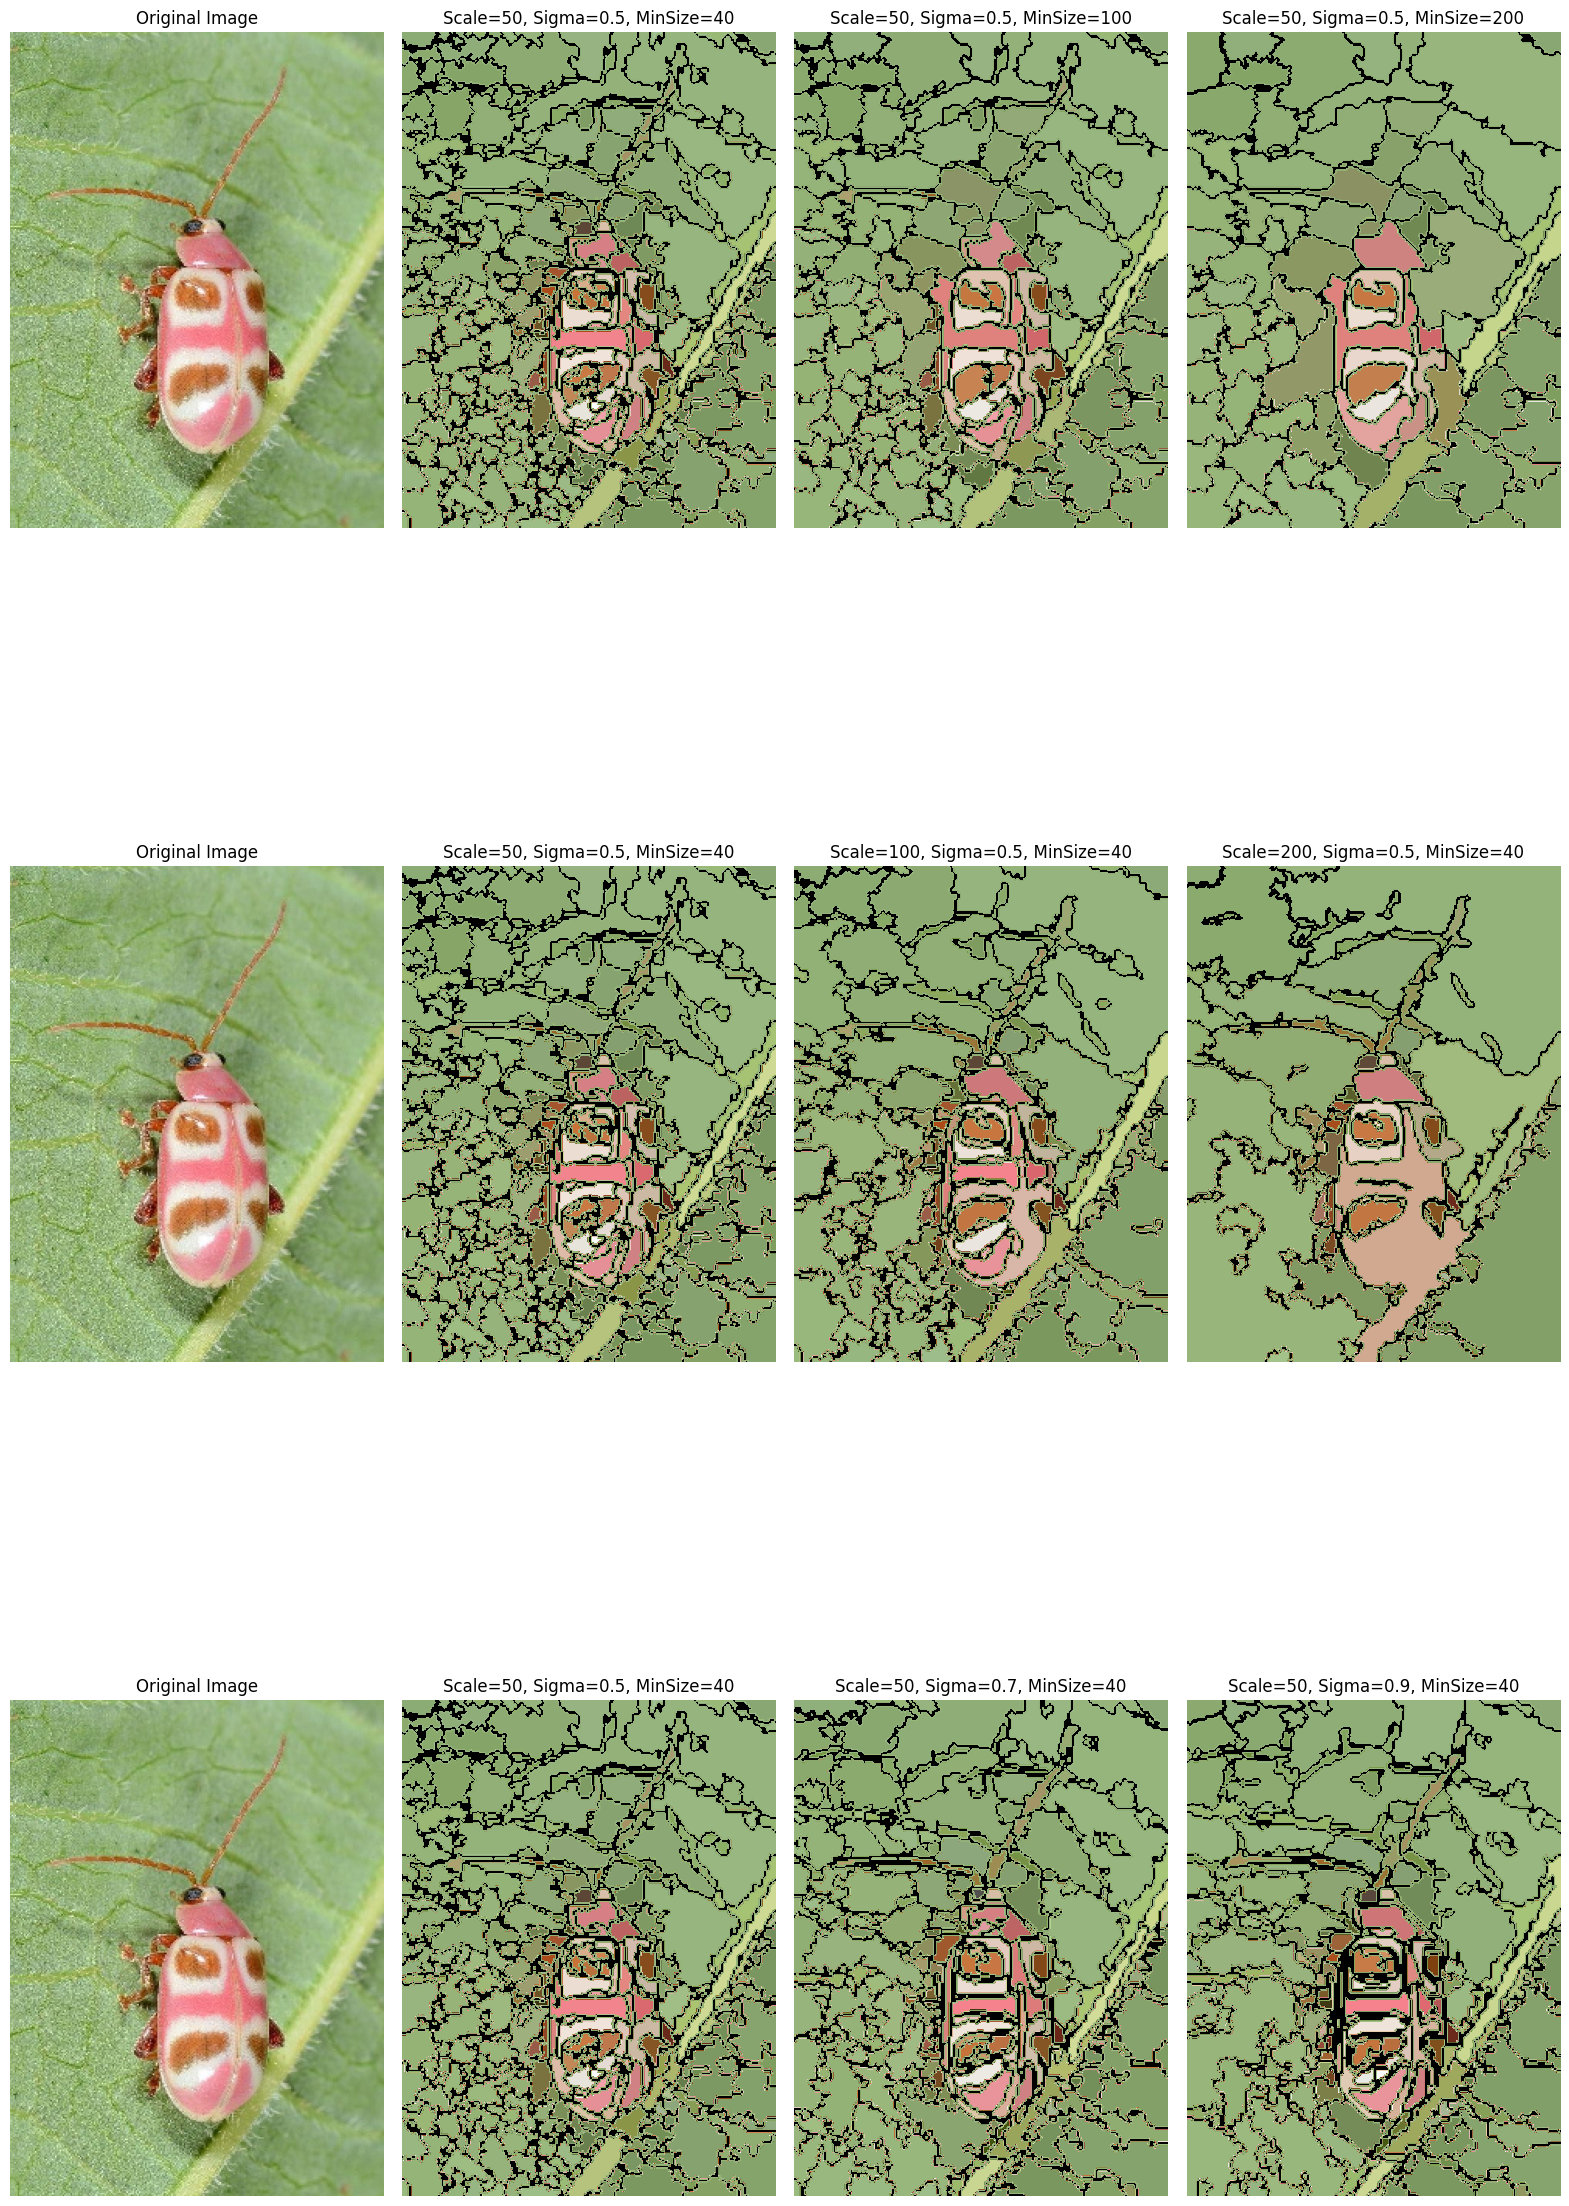

In [ ]:
img = img_as_float(io.imread('/content/bug.jpg')[::2, ::2, :3])  #slicing, ::2 taking the second pixel along rows and columns, :3 taking RGB channels only
#(scale , sigma , min_size)
parameters = [
    [(50, 0.5, 40), (50, 0.5, 100), (50, 0.5, 200)],  # Variations in min_size
    [(50, 0.5, 40), (100, 0.5, 40), (200, 0.5, 40)],  # Variations in scale
    [(50, 0.5, 40), (50, 0.7, 40), (50, 0.9, 40)]     # Variations in sigma
]

plt.figure(figsize=(20, 30))

for row, param_set in enumerate(parameters):
    # original image in the first column of each row
    plt.subplot(3, 4, row * 4 + 1)                   #3 rows, 4 columns, for row 0 image will be in first subplot, for 1= 1 * 4 + 1 in 5 subplot, for 2= 2* 4 + 1 in 9
    plt.imshow(img)
    plt.title('Original Image', size=12)
    plt.axis('off')

    # Plot each segmentation in the rest of the columns
    for col, (scale, sigma, min_size) in enumerate(param_set, start=1):
        segments_fz = felzenszwalb(img, scale=scale, sigma=sigma, min_size=min_size)
        borders = find_boundaries(segments_fz)
        unique_colors = np.unique(segments_fz.ravel())
        segments_fz[borders] = -1                   #for visualization purposes to clearly delineate the boundaries between different segments

        # Create a custom colormap for visualization
        colors = [np.zeros(3)]
        for color in unique_colors:
            mask = segments_fz == color
            if np.any(mask):
                color_mean = np.mean(img[mask], axis=0)
                colors.append(color_mean)
            else:
                colors.append(np.zeros(3))

        cm = LinearSegmentedColormap.from_list('palette', colors, N=len(colors))

        # Plotting
        plt.subplot(3, 4, row * 4 + col + 1)
        plt.imshow(segments_fz, cmap=cm)
        plt.title(f'Scale={scale}, Sigma={sigma}, MinSize={min_size}', size=12)
        plt.axis('off')

#(width between subplots 5%, Hight between 30%)
plt.subplots_adjust(wspace=0.05, hspace=0.30)
plt.show()

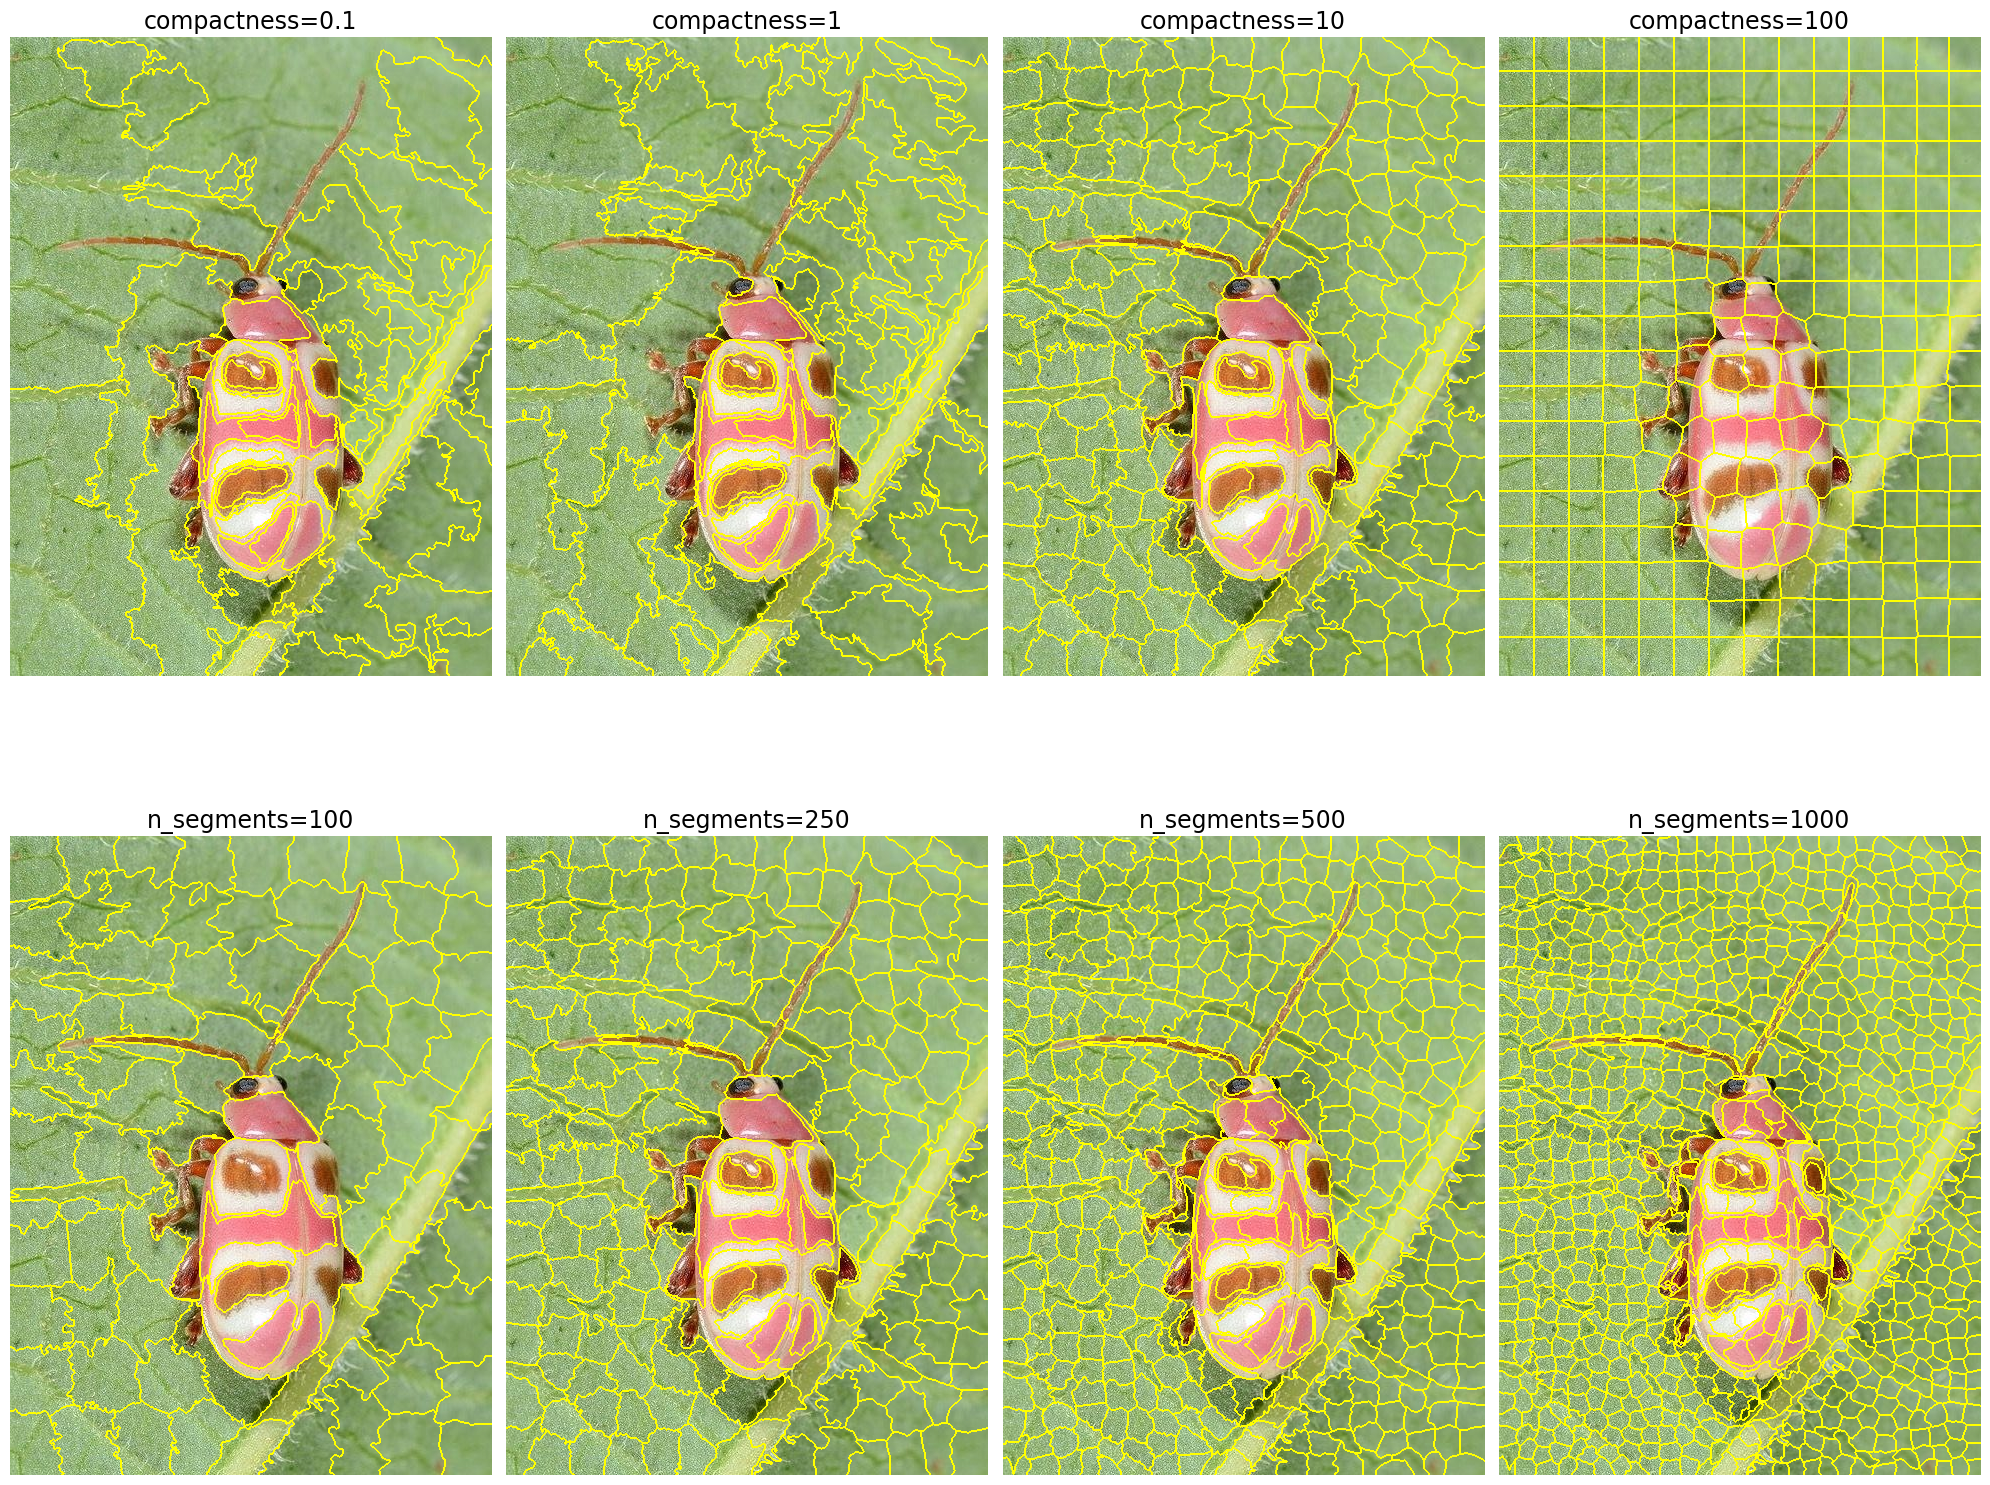

In [ ]:
img = img_as_float(io.imread('/content/bug.jpg'))

plt.figure(figsize=(20, 20))

# Define parameters for plotting
compactness_values = [0.1, 1, 10, 100]
n_segments_values = [100, 250, 500, 1000]
sigma = 1

# Different compactness values
for i, compactness in enumerate(compactness_values, start=1):
    plt.subplot(2, 4, i)  #
    segments_slic = slic(img, n_segments=250, compactness=compactness, sigma=sigma)
    outlined_image = mark_boundaries(img, segments_slic)
    plt.imshow(outlined_image)
    plt.title(f'compactness={compactness}', size=17)
    plt.axis('off')

# Different n_segments values
for i, n_segments in enumerate(n_segments_values, start=1):
    plt.subplot(2, 4, i + 4)
    segments_slic = slic(img, n_segments=n_segments, compactness=10, sigma=sigma)
    outlined_image = mark_boundaries(img, segments_slic)
    plt.imshow(outlined_image)
    plt.title(f'n_segments={n_segments}', size=17)
    plt.axis('off')

# left, bottom, right, top
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()